In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [ ]:
X, y = make_regression(n_samples=100,
                       n_features=10,
                       n_informative=5,
                       n_targets=1,
                       random_state=42)
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred1 = gbr.predict(X_test)
print("Gradient Boosting - R2: ",
      r2_score(y_test, y_pred1))

Gradient Boosting - R2:  0.8695904910207339


In [ ]:
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
y_pred2 = xgr.predict(X_test)
print("XGBoost - R2: ",
      r2_score(y_test, y_pred2))

XGBoost - R2:  0.857454683683808


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adr = AdaBoostRegressor()
adr.fit(X_train, y_train)
y_pred3 = adr.predict(X_test)
print("AdaBoost - R2: ",
      r2_score(y_test, y_pred3))

AdaBoost - R2:  0.7532976403913639


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
					cluster_std=0.50, random_state=0)

['y', 'b', 'g', 'r']


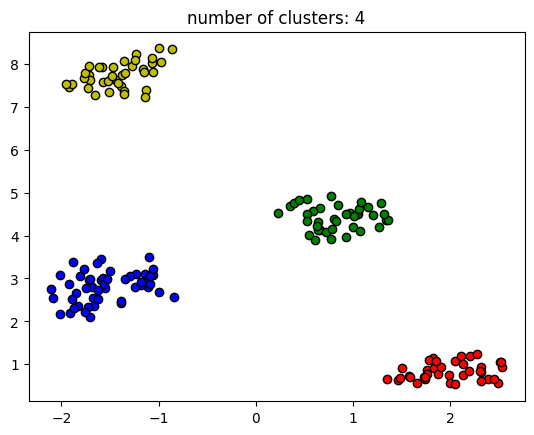

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31
